# Figure 4: Creation

Here, we re-create a plot in Figure 4 (a) from 

- M. Beg *et al.* Stable and manipulable Bloch point. [*Scientific Reports* **9**, 7959](https://www.nature.com/articles/s41598-019-44462-2) (2019).

### (optional) Micromagnetic simulations

This notebook uses results from `*.txt` files which are already in this repository. The script used to generate result files is `src/creation.py` and if you want to re-execute micromagnetic simulations, please run:

    $ make creation
    
Micromagnetic simulations will be run inside [Docker](https://www.docker.com/) container, which contains all the necessary software. Therefore, please make sure you have Docker installed on your machine - installation instructions can be found [here](https://docs.docker.com/install/).

Details about Docker images, VTK, and H5 files can be found in `README.md` file of [`marijanbeg/2019-paper-bloch-point-stability`](https://github.com/marijanbeg/2019-paper-bloch-point-stability) GitHub repository.

### Plot
    
We start by reading the results from `*.txt` files:

In [1]:
import os
import numpy as np

# geometry parameters
d = 150  # disk diameter (nm)
hb = 20  # bottom-layer thickness (nm)
ht = 10  # top-layer thickness (nm)

# time array
T = 500e-12  # total simulation time (s)
dt = 1e-12  # time step (s)
t_array = np.arange(0, T+dt/2, dt)/1e-12

mz_top = []  # average mz in the top-layer
mz_bottom = []  # average mz in bottom-layer
S_top = []  # skyrmion number in the top-layer
S_bottom = []  # skyrmion number in the bottom-layer
for t in t_array:
    basename = f'd{d}hb{hb}ht{ht}'
    rdir = os.path.join('..', 'results', 'creation', basename)
    with open(os.path.join(rdir, f't{int(t)}.txt'), 'r') as f:
        data = eval(f.read())

    mz_top.append(data['average_top'][2])
    mz_bottom.append(data['average_bottom'][2])
    S_top.append(data['S_top']/ht)
    S_bottom.append(data['S_bottom']/hb)

Finally, we can make the plot:

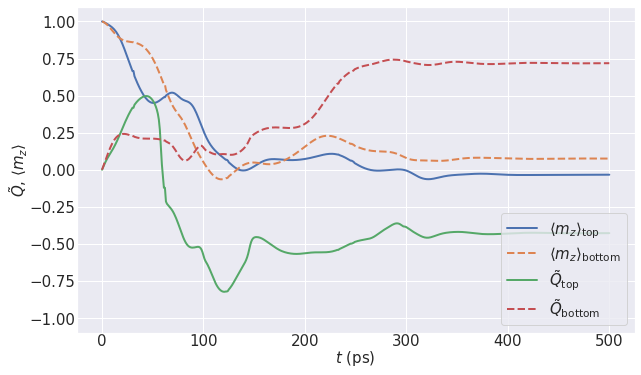

In [2]:
%config InlineBackend.figure_formats = ['svg']  # output matplotlib plots as SVG
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.style.use('customstyle.mplstyle')

plt.figure(figsize=(10, 6))
plt.plot(t_array, mz_top, '-', label=r'$\langle m_{z} \rangle_\mathrm{top}$')
plt.plot(t_array, mz_bottom, '--', label=r'$\langle m_{z} \rangle_\mathrm{bottom}$')
plt.plot(t_array, S_top, '-', label=r'$\tilde{Q}_\mathrm{top}$')
plt.plot(t_array, S_bottom, '--', label=r'$\tilde{Q}_\mathrm{bottom}$')
plt.xlabel(r'$t$ (ps)')
plt.ylabel(r'$\tilde{Q}$, $\langle m_{z} \rangle$')
plt.ylim([-1.1, 1.1])
plt.legend(loc='lower right')
plt.show()